In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [8]:
data = pd.read_csv("HW-2-b.csv")

In [6]:
# Counting the unique races and cars in the dataset
unique_races = data['time'].nunique()
unique_cars = data['id'].nunique()

print("The total number of unique races in the dataset: ", unique_races)
print("The total number of unique cars in the dataset: ", unique_cars)


The total number of unique races in the dataset:  6
The total number of unique cars in the dataset:  100


           points    safety     speed   ability    weight
points   1.000000 -0.340148  0.606769  0.674655 -0.381628
safety  -0.340148  1.000000 -0.205999 -0.003695 -0.020087
speed    0.606769 -0.205999  1.000000  0.031055  0.020982
ability  0.674655 -0.003695  0.031055  1.000000 -0.011564
weight  -0.381628 -0.020087  0.020982 -0.011564  1.000000


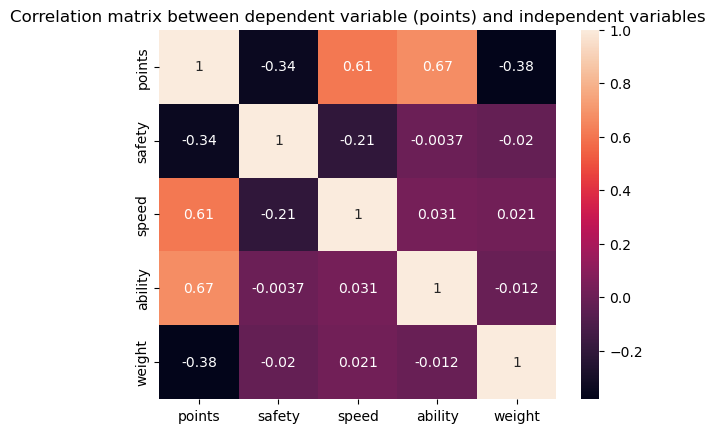

In [22]:
# Calculating the correlation matrix for the selected columns
# subsetting data and building a correlation matrix
subset_data = data[['points', 'safety', 'speed', 'ability', 'weight']]
correlation_matrix = subset_data.corr()

# Showing the correlation matrix
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix between dependent variable (points) and independent variables")
plt.show()

In [9]:
# Preparing the independent and dependent variables
X = data[['safety', 'speed', 'ability', 'weight']]  # Independent variables
y = data['points']  # Dependent variable

# Adding a constant to the independent variable for intercept
X = sm.add_constant(X)

# Creating a model and fitting the data
model = sm.OLS(y, X).fit()

# Getting the summary of the regression
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.377e+06
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:07:42   Log-Likelihood:                -203.22
No. Observations:                1040   AIC:                             416.4
Df Residuals:                    1035   BIC:                             441.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0764      0.101      0.753      0.452      -0.123       0.275
safety        -0.5979      0.000  -1395.960      0.000      -0.599      -0.597
speed          1.5115      0.000   3274.494      0.000       1.511       1.512
ability        3.7136      0.001   3992.857      0.000       3.712       3.715
weight        -2.2223      0.001  -2389.022      0.000      -2.224      -2.221
==============================================================================
Omnibus:                      781.286   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.616
Skew:                          -0.010   Prob(JB):                     2.53e-14
Kurtosis:                       1.798   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Preparing the independent and dependent variables for separate models
# Model 1: Effect of new technology on points
X_points = sm.add_constant(data[['tech']])  # Independent variable for points model
y_points = data['points']  # Dependent variable for points model

# Model 2: Effect of new technology on safety
X_safety = sm.add_constant(data[['tech']])  # Independent variable for safety model
y_safety = data['safety']  # Dependent variable for safety model

# Model 3: Effect of new technology on ability
X_ability = sm.add_constant(data[['tech']])  # Independent variable for ability model
y_ability = data['ability']  # Dependent variable for ability model

# Creating and fitting the models
model_points = sm.OLS(y_points, X_points).fit()
model_safety = sm.OLS(y_safety, X_safety).fit()
model_ability = sm.OLS(y_ability, X_ability).fit()

# Getting the summaries of the regression models
model_points_summary = model_points.summary()
model_safety_summary = model_safety.summary()
model_ability_summary = model_ability.summary()

model_points_summary, model_safety_summary, model_ability_summary


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                 points   R-squared:                       0.028
 Model:                            OLS   Adj. R-squared:                  0.027
 Method:                 Least Squares   F-statistic:                     29.94
 Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.59e-08
 Time:                        12:11:04   Log-Likelihood:                -5647.4
 No. Observations:                1040   AIC:                         1.130e+04
 Df Residuals:                    1038   BIC:                         1.131e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [25]:
# Checking for independence between 'tech' and all other variables

# Function to perform chi-square test for each variable against 'tech'
def chi_square_test(data, variable):
    contingency_table = pd.crosstab(data['tech'], data[variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Variables to check against 'tech'
variables_to_check = ['after']

# Dictionary to store the chi-square test results
chi_square_results = {}

# Performing the test for each variable
for var in variables_to_check:
    chi_square_results[var] = chi_square_test(data, var)

chi_square_results


{'after': (3.667437775080365e-05, 0.9951680905846758)}

In [26]:
# Splitting the data based on the 'tech' variable
group_0 = data[data['tech'] == 0]
group_1 = data[data['tech'] == 1]

# Descriptive statistics
descriptive_stats = pd.DataFrame({
    'Mean (Tech=0)': group_0.mean(),
    'Mean (Tech=1)': group_1.mean(),
    'Std Dev (Tech=0)': group_0.std(),
    'Std Dev (Tech=1)': group_1.std()
})

# T-tests for each covariate
t_test_results = {}
for column in ['safety', 'speed', 'weight', 'ability', 'points']:
    t_stat, p_value = ttest_ind(group_0[column], group_1[column])
    t_test_results[column] = {'t-statistic': t_stat, 'p-value': p_value}

descriptive_stats, t_test_results


(         Mean (Tech=0)  Mean (Tech=1)  Std Dev (Tech=0)  Std Dev (Tech=1)
 id           48.367442      47.924590         29.437459         29.091062
 tech          0.000000       1.000000          0.000000          0.000000
 after         0.490698       0.488525          0.500496          0.500279
 time          2.165116       2.088525          1.547445          1.472919
 safety       49.027906      39.449914         20.698075         21.757787
 speed        50.030198      54.891349         19.944078         20.267363
 weight       69.424683      69.407371          9.771366          9.894601
 ability      74.489419      76.080049          9.743504          9.866523
 points      168.706977     187.749180         54.091632         56.081992,
 {'safety': {'t-statistic': 7.132527697997443,
   'p-value': 1.845430493267503e-12},
  'speed': {'t-statistic': -3.834275117197246,
   'p-value': 0.00013351520490365146},
  'weight': {'t-statistic': 0.027929771420526814,
   'p-value': 0.977723532214

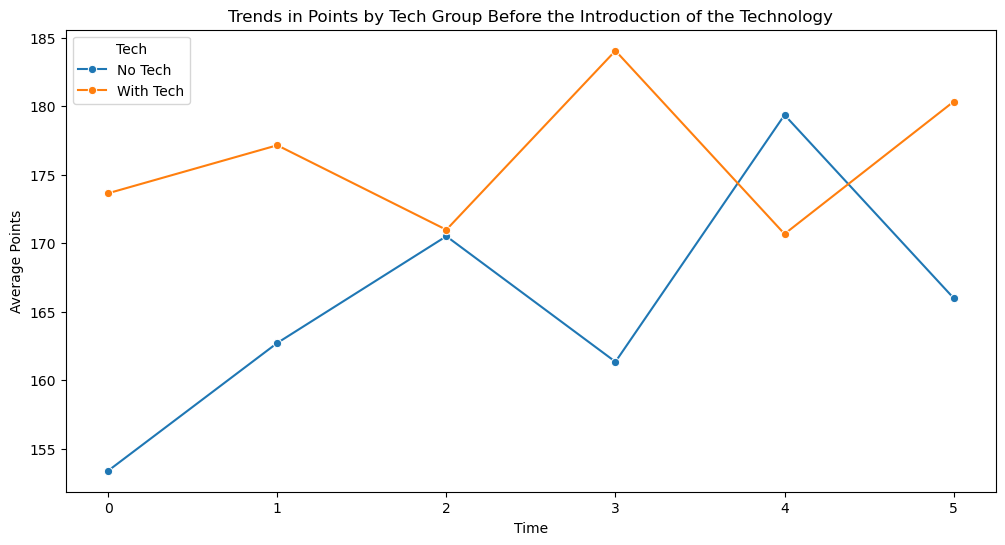

In [28]:
# Re-importing necessary libraries and re-loading the data due to code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
file_path = 'HW-2-b.csv'
data = pd.read_csv(file_path)

# Filtering data to include only observations before the introduction of the technology
pre_treatment_data = data[data['after'] == 0]

# Grouping by 'tech' and 'time' to calculate the mean of 'points'
grouped_data = pre_treatment_data.groupby(['tech', 'time']).mean().reset_index()

# Plotting the trends for both groups (tech = 0 and tech = 1) over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='time', y='points', hue='tech', marker='o')
plt.title('Trends in Points by Tech Group Before the Introduction of the Technology')
plt.xlabel('Time')
plt.ylabel('Average Points')
plt.legend(title='Tech', labels=['No Tech', 'With Tech'])
plt.show()


In [30]:
#Stable composition test
group_count = data.groupby(['id', 'tech']).size().unstack(fill_value=0)
unstable_composition_cars = group_count[(group_count[0] > 0) & (group_count[1] > 0)]
print(unstable_composition_cars)

tech  0  1
id        
0     7  4
1     5  7
2     3  9
3     6  6
4     6  6
..   .. ..
95    2  8
96    6  4
97    5  5
98    4  6
99    6  4

[100 rows x 2 columns]


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances
import numpy as np

# Step 1: Propensity Score Matching

# Logistic regression model to estimate propensity scores
# Using 'tech' as the dependent variable and other covariates for matching
logit_model = LogisticRegression()
X_match = data[['safety', 'speed', 'weight', 'ability']]
y_match = data['tech']

# Fitting the logistic regression model
logit_model.fit(X_match, y_match)

# Estimating propensity scores
propensity_scores = logit_model.predict_proba(X_match)[:, 1]

# Adding the propensity scores to the dataset
data['propensity_score'] = propensity_scores

# Implementing matching - Nearest Neighbor Matching
# For simplicity, we take a 1-to-1 matching without replacement

# Separating treatment and control groups
treatment = data[data['tech'] == 1]
control = data[data['tech'] == 0]

# Calculating pairwise distance matrix between treatment and control groups based on propensity scores
distance_matrix = pairwise_distances(treatment['propensity_score'].values.reshape(-1, 1),
                                     control['propensity_score'].values.reshape(-1, 1))

# For each treatment unit, find the index of the closest control unit
min_distances_indices = np.argmin(distance_matrix, axis=1)

# Extracting the matched control units
matched_control = control.iloc[min_distances_indices]

# Concatenating the matched treatment and control units
matched_data = pd.concat([treatment, matched_control])

matched_data.head()  # Displaying the first few rows of the matched data



,id,tech,after,time,safety,speed,weight,ability,points,propensity_score
1,2,1,0,0,68.452895,58.336126,46.238298,83.298663,254,0.522074
2,3,1,0,0,9.825860,63.345852,78.790024,82.463555,221,0.771961
4,5,1,0,0,14.739271,52.761438,48.631813,81.247646,265,0.742687
6,7,1,0,0,24.823326,31.513777,80.874570,81.561710,156,0.657966
7,8,1,0,0,3.956918,60.637896,68.608305,76.379461,221,0.772849


In [43]:
# Preparing the data for DiD regression with the matched dataset
# Creating the interaction term between 'tech' and 'after' for the DiD analysis
matched_data['tech_after'] = matched_data['tech'] * matched_data['after']

# Independent variables: 'tech', 'after', and the interaction term 'tech_after'
X_matched = matched_data[['tech', 'after', 'tech_after']]

# Adding a constant to the independent variables
X_matched = sm.add_constant(X_matched)

# Dependent variable: 'points'
y_matched = matched_data['points']

# Creating the DiD regression model with matched data
did_model_matched = sm.OLS(y_matched, X_matched)

# Fitting the model with clustered standard errors by 'time'
clustered_results_matched = did_model_matched.fit(cov_type='cluster', cov_kwds={'groups': matched_data['id']})

# Getting the summary of the model with clustered standard errors by time
clustered_results_matched_summary = clustered_results_matched.summary()
clustered_results_matched_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     13.38
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           2.12e-07
Time:                        16:35:57   Log-Likelihood:                -6639.1
No. Observations:                1220   AIC:                         1.329e+04
Df Residuals:                    1216   BIC:                         1.331e+04
Df Model:                           3                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.5492     11.416     15.815      0.000     158.174     202.924
tech          -4.7672     11.843     -0.403      0.687     -27.979      18.444
after          5.1220     11.393      0.450      0.653     -17.208      27.452
tech_after    19.3745     12.700      1.525      0.127      -5.518      44.267
==============================================================================
Omnibus:                       27.612   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.664
Skew:                           0.267   Prob(JB):                     1.80e-08
Kurtosis:                       3.645   Cond. No.                         6.77
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

NameError: name 'data_new' is not defined

In [41]:
# Step 1: Propensity Score Matching for the new setup
# Using 'speed', 'weight', 'ability', and 'points' for matching

# Fitting the logistic regression model for propensity score estimation
logit_model.fit(X_match, y_match)  # X_match and y_match are already defined with the new matching covariates

# Estimating propensity scores with the new model
propensity_scores_new = logit_model.predict_proba(X_match)[:, 1]

# Adding the new propensity scores to the dataset
data['propensity_score_new'] = propensity_scores_new

# Implementing matching - Nearest Neighbor Matching for the new setup

# Separating treatment and control groups
treatment_new = data[data['tech'] == 1]
control_new = data[data['tech'] == 0]

# Calculating pairwise distance matrix based on the new propensity scores
distance_matrix_new = pairwise_distances(treatment_new['propensity_score_new'].values.reshape(-1, 1),
                                         control_new['propensity_score_new'].values.reshape(-1, 1))

# Finding the index of the closest control unit for each treatment unit
min_distances_indices_new = np.argmin(distance_matrix_new, axis=1)

# Extracting the matched control units
matched_control_new = control_new.iloc[min_distances_indices_new]

# Concatenating the matched treatment and control units
matched_data_new = pd.concat([treatment_new, matched_control_new])

# Step 2: DiD Regression with the matched data, considering 'safety' as the dependent variable

# Creating the interaction term 'tech_after' for the DiD analysis
matched_data_new['tech_after'] = matched_data_new['tech'] * matched_data_new['after']

# Independent variables: 'tech', 'after', and 'tech_after'
X_matched_safety = matched_data_new[['tech', 'after', 'tech_after']]
X_matched_safety = sm.add_constant(X_matched_safety)

# Dependent variable: 'safety'
y_matched_safety = matched_data_new['safety']

# Creating the DiD regression model with matched data
did_model_matched_safety = sm.OLS(y_matched_safety, X_matched_safety)

# Fitting the model with clustered standard errors by 'id'
clustered_results_matched_safety = did_model_matched_safety.fit(cov_type='cluster', cov_kwds={'groups': matched_data_new['id']})

# Getting the summary of the model
clustered_results_matched_safety_summary = clustered_results_matched_safety.summary()
clustered_results_matched_safety_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 safety   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     42.24
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.16e-17
Time:                        16:32:29   Log-Likelihood:                -5410.6
No. Observations:                1220   AIC:                         1.083e+04
Df Residuals:                    1216   BIC:                         1.085e+04
Df Model:                           3                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.2013      2.553     16.141      0.000      36.198      46.204
tech           7.0551      2.709      2.605      0.009       1.746      12.364
after         -5.7390      3.198     -1.795      0.073     -12.006       0.528
tech_after   -12.2875      3.448     -3.564      0.000     -19.046      -5.530
==============================================================================
Omnibus:                       19.032   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.800
Skew:                           0.180   Prob(JB):                     0.000611
Kurtosis:                       2.598   Cond. No.                         6.77
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [45]:
# Step 1: Propensity Score Matching for the new setup with 'ability' as the dependent variable
# Using 'speed', 'weight', 'safety', and 'points' for matching

# Fitting the logistic regression model for propensity score estimation
logit_model.fit(X_match, y_match)  # X_match and y_match are already defined with the new matching covariates

# Estimating propensity scores with the new model
propensity_scores_ability = logit_model.predict_proba(X_match)[:, 1]

# Adding the new propensity scores to the dataset
data['propensity_score_ability'] = propensity_scores_ability

# Implementing matching - Nearest Neighbor Matching for the new setup

# Separating treatment and control groups
treatment_ability = data[data['tech'] == 1]
control_ability = data[data['tech'] == 0]

# Calculating pairwise distance matrix based on the new propensity scores
distance_matrix_ability = pairwise_distances(treatment_ability['propensity_score_ability'].values.reshape(-1, 1),
                                             control_ability['propensity_score_ability'].values.reshape(-1, 1))

# Finding the index of the closest control unit for each treatment unit
min_distances_indices_ability = np.argmin(distance_matrix_ability, axis=1)

# Extracting the matched control units
matched_control_ability = control_ability.iloc[min_distances_indices_ability]

# Concatenating the matched treatment and control units
matched_data_ability = pd.concat([treatment_ability, matched_control_ability])

# Step 2: DiD Regression with the matched data, considering 'ability' as the dependent variable

# Creating the interaction term 'tech_after' for the DiD analysis
matched_data_ability['tech_after'] = matched_data_ability['tech'] * matched_data_ability['after']

# Independent variables: 'tech', 'after', and 'tech_after'
X_matched_ability = matched_data_ability[['tech', 'after', 'tech_after']]
X_matched_ability = sm.add_constant(X_matched_ability)

# Dependent variable: 'ability'
y_matched_ability = matched_data_ability['ability']

# Creating the DiD regression model with matched data
did_model_matched_ability = sm.OLS(y_matched_ability, X_matched_ability)

# Fitting the model with clustered standard errors by 'id'
clustered_results_matched_ability = did_model_matched_ability.fit(cov_type='cluster', cov_kwds={'groups': matched_data_ability['id']})

# Getting the summary of the model
clustered_results_matched_ability_summary = clustered_results_matched_ability.summary()
clustered_results_matched_ability_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ability   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2201
Date:                Tue, 21 Nov 2023   Prob (F-statistic):              0.882
Time:                        16:46:42   Log-Likelihood:                -4499.2
No. Observations:                1220   AIC:                             9006.
Df Residuals:                    1216   BIC:                             9027.
Df Model:                           3                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.6114      1.683     44.931      0.000      72.313      78.910
tech           0.1843      1.808      0.102      0.919      -3.359       3.728
after          0.4555      1.971      0.231      0.817      -3.408       4.319
tech_after     0.1264      2.177      0.058      0.954      -4.140       4.392
==============================================================================
Omnibus:                        4.462   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                4.416
Skew:                           0.147   Prob(JB):                        0.110
Kurtosis:                       3.019   Cond. No.                         6.77
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

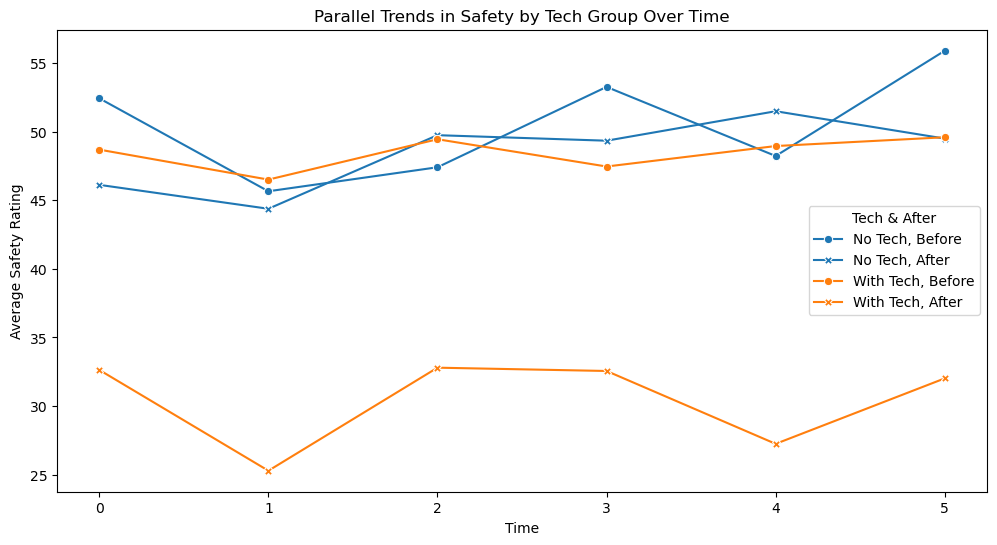

In [51]:
# Preparing the data for visualizing parallel trends with 'safety' as the dependent variable
# Filtering data to include observations for both before and after the introduction of the technology
grouped_data_safety = data.groupby(['tech', 'after', 'time']).mean()['safety'].reset_index()

# Plotting the trends for both groups (tech = 0 and tech = 1) over time for 'safety'
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data_safety, x='time', y='safety', hue='tech', style='after', markers=True, dashes=False)
plt.title('Parallel Trends in Safety by Tech Group Over Time')
plt.xlabel('Time')
plt.ylabel('Average Safety Rating')
plt.legend(title='Tech & After', labels=['No Tech, Before', 'No Tech, After', 'With Tech, Before', 'With Tech, After'])
plt.show()


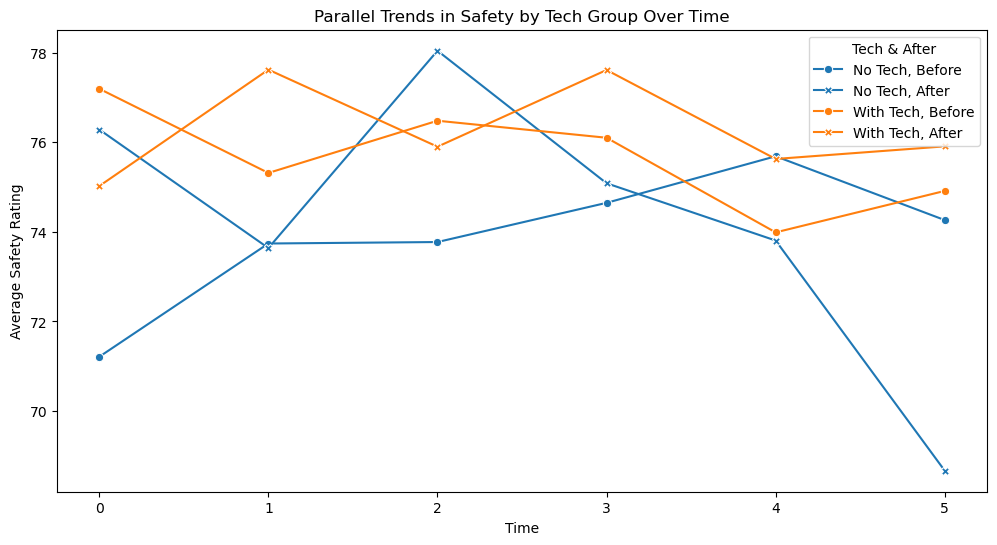

In [49]:
# Preparing the data for visualizing parallel trends with 'safety' as the dependent variable
# Filtering data to include observations for both before and after the introduction of the technology
grouped_data_safety = data.groupby(['tech', 'after', 'time']).mean()['ability'].reset_index()

# Plotting the trends for both groups (tech = 0 and tech = 1) over time for 'safety'
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data_safety, x='time', y='ability', hue='tech', style='after', markers=True, dashes=False)
plt.title('Parallel Trends in Safety by Tech Group Over Time')
plt.xlabel('Time')
plt.ylabel('Average Safety Rating')
plt.legend(title='Tech & After', labels=['No Tech, Before', 'No Tech, After', 'With Tech, Before', 'With Tech, After'])
plt.show()
